This is basic revision of digit classification, we have tried different methods below.

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline 
import numpy as np
from keras.layers import Dense


2024-08-13 18:51:36.492933: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-13 18:51:36.497353: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-13 18:51:36.510964: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-13 18:51:36.528838: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-13 18:51:36.537006: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-13 18:51:36.560965: I tensorflow/core/platform/cpu_feature_gu

In [2]:
(X_train,Y_train),(X_test, Y_test) =keras.datasets.mnist.load_data()

In [3]:
len(X_train)

60000

In [4]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [5]:
len(X_train)
len(X_test)

10000

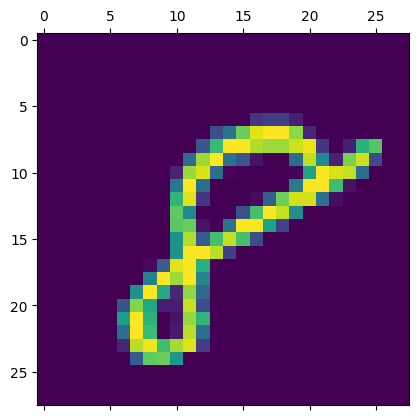

In [6]:
plt.matshow(X_train[59999])

In [7]:
print(Y_train[59999])
print(Y_train[:5])

8
[5 0 4 1 9]


In [8]:
# to scale the data
X_train=X_train/255
X_test=X_test/255

In [10]:
# we have flattened the 28x28 image pixel matrix to 784x1 matrix; 
X_train_flattened=X_train.reshape(len(X_train),28*28)
X_test_flattened=X_test.reshape(len(X_test),28*28)
print(X_train_flattened.shape)
print(X_test_flattened.shape)


(60000, 784)
(10000, 784)


In [11]:
print(X_train_flattened[0])
print(X_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [17]:
model=keras.Sequential([
    Dense(100,input_shape=(784,),activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train_flattened,Y_train,epochs=5)                    

Epoch 1/5


2024-08-13 18:54:03.203588: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 992us/step - accuracy: 0.8101 - loss: 0.8255
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 995us/step - accuracy: 0.9146 - loss: 0.3098
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 973us/step - accuracy: 0.9187 - loss: 0.2904
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 988us/step - accuracy: 0.9234 - loss: 0.2739
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9244 - loss: 0.2668


In [18]:
(loss, accuracy)=model.evaluate(X_test_flattened,Y_test)
loss, accuracy

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 717us/step - accuracy: 0.9128 - loss: 0.3052


(0.26890745759010315, 0.9248999953269958)

In [19]:
Y_predicted=model.predict(X_test_flattened)
Y_predicted.shape

 73/313 ━━━━━━━━━━━━━━━━━━━━ 0s 703us/step

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 732us/step


(10000, 100)

4

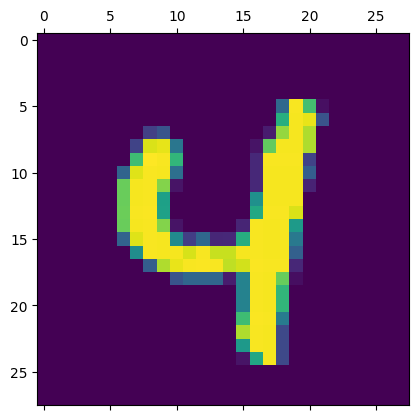

In [20]:
plt.matshow(X_test[541])
np.argmax(Y_predicted[541])

In [22]:
# helre we have taken  the Y_predicted floating to integers, such that we dont need to do argmax! 
Y_predicted_labels=[np.argmax(i) for i in Y_predicted]
# the o/p will be a numpy array

In [23]:
# now lets check if the test and train are ok
print(Y_test[:10])
print(Y_predicted_labels[:10])


[7 2 1 0 4 1 4 9 5 9]
[7, 2, 1, 0, 4, 1, 4, 9, 6, 9]


In [24]:
CM=tf.math.confusion_matrix(labels=Y_test,predictions=Y_predicted_labels)
CM

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 959,    0,    3,    3,    0,    7,    4,    2,    2,    0],
       [   0, 1118,    3,    3,    0,    1,    3,    2,    5,    0],
       [   3,    9,  947,   15,    9,    4,    9,    9,   23,    4],
       [   3,    0,   23,  934,    1,   18,    1,    8,   16,    6],
       [   2,    2,    6,    1,  928,    0,    5,    3,    8,   27],
       [   8,    3,    7,   42,   12,  774,    8,    5,   28,    5],
       [  13,    3,   13,    1,    9,   16,  899,    2,    2,    0],
       [   1,   11,   26,    9,   11,    1,    0,  945,    0,   24],
       [   7,   12,    9,   30,    9,   29,    9,   12,  851,    6],
       [  10,    7,    2,   13,   45,    7,    0,   27,    4,  894]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

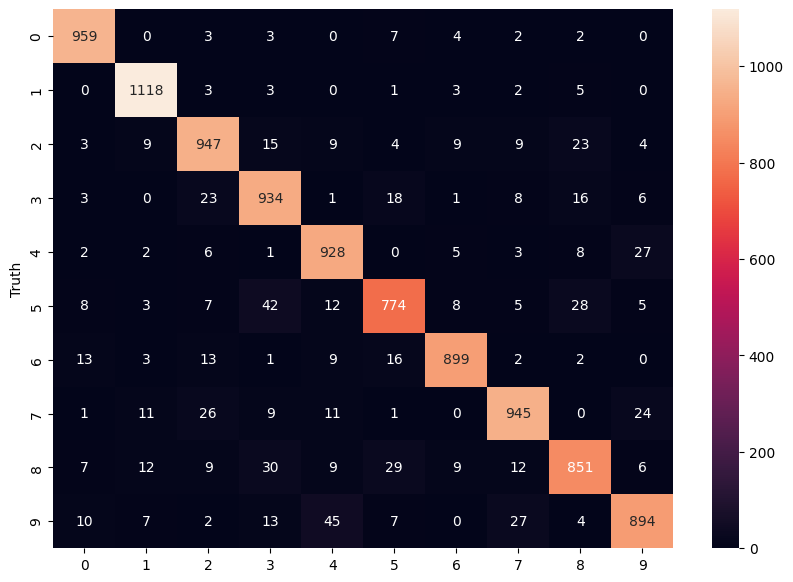

In [26]:
# CM in visually appleaing way
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(CM, annot=True, fmt='d')
plt.xlabel=('Predicted')
plt.ylabel('Truth')

In [31]:
# since we see many incorrect predictions we will now improve out model
model=keras.Sequential([
    Dense(100,input_shape=(784,),activation='relu'),
    Dense(10,activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train_flattened,Y_train,epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8695 - loss: 0.4651
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9609 - loss: 0.1317
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9739 - loss: 0.0852
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9805 - loss: 0.0639
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9842 - loss: 0.0526


In [32]:
loss, accurate=model.evaluate(X_test_flattened,Y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 710us/step - accuracy: 0.9747 - loss: 0.0908


We have gone into very basic , so we would directly flatten out data in the layer creation time

In [33]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    Dense(100,activation='relu'),
    Dense(10,activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train,Y_train,epochs=5)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8746 - loss: 0.4528
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9616 - loss: 0.1370
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9738 - loss: 0.0915
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9804 - loss: 0.0664
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9841 - loss: 0.0541


In [35]:
model.evaluate(X_test,Y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 790us/step - accuracy: 0.9721 - loss: 0.0916


[0.0772709995508194, 0.9765999913215637]